React Agnet = Reasoning and action

In [61]:
# configure model
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4.1")

In [79]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,END,START
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode

In [36]:
def call_model(state:MessagesState):
    question=state["messages"]
    print("this is current message",question)
    response = model.invoke(question)
    return {"messages":[response]}

In [37]:
state = {"messages":["Hi how are you"]}

In [38]:
call_model(state)

this is current message ['Hi how are you']


{'messages': [AIMessage(content="Hello! I'm here to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 730, 'prompt_tokens': 12, 'total_tokens': 742, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 704, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_3da8b0b088', 'id': 'chatcmpl-BiC3Oc7mmwdEo6Gfwi7TZeWe61DbZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--977358da-9a63-422c-bd4d-06cdd60a334a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 730, 'total_tokens': 742, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 704}})]}

In [39]:
workflow = StateGraph(MessagesState)

In [40]:
workflow.add_node("my_bot",call_model)

In [41]:
workflow.add_edge(START,"my_bot")

In [42]:
workflow.add_edge("my_bot",END)

In [43]:
app=workflow.compile()

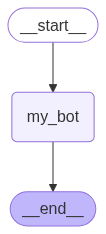

In [44]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [45]:
input={"messages":["hi hello how are you?"]}
app.invoke(input)


this is current message [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='71010125-27b1-4a5d-888b-e23096a6d547')]


{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='71010125-27b1-4a5d-888b-e23096a6d547'),
  AIMessage(content="Hi! I'm doing well, thank you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 283, 'prompt_tokens': 13, 'total_tokens': 296, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_3da8b0b088', 'id': 'chatcmpl-BiC3vHbm7kdI83dWsEOul0WNbYGNN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--567ea15f-e3c5-4484-9c18-d93097076f74-0', usage_metadata={'input_tokens': 13, 'output_tokens': 283, 'total_tokens': 296, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning

In [63]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

In [64]:
search.invoke("what is the temp in kashmir")

'the temp is 25 degree and cloudy'

In [65]:
search.invoke("what is the temp in delhi")

'the temp is 45 degree and sunny'

In [66]:
model.invoke("what is a weather in delhi?")

AIMessage(content='I don’t have real-time weather data, but I can help you find it!\n\n**To check the current weather in Delhi:**\n- Search “Delhi weather” on Google or another search engine.\n- Use a trusted weather website or app like [AccuWeather](https://www.accuweather.com/), [Weather.com](https://weather.com/), or the [India Meteorological Department (IMD)](https://mausam.imd.gov.in/).\n\n**Typical Delhi weather in June/July:**\n- **Temperature:** 28°C to 42°C\n- **Conditions:** Hot, often humid; possibility of monsoon rains\n- **Humidity:** Often high, especially after rain\n\nLet me know if you want more details or historical climate information!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 15, 'total_tokens': 172, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tok

In [67]:
tools=[search]

In [68]:
llm_with_tool=model.bind_tools(tools)

In [69]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [70]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_LvDYXEd4RvWffXQpJUvsVHaL', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 54, 'total_tokens': 69, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BiCjbBxOrSrz00tBuimg3ZYK8de2F', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--82fbad95-da15-4d14-b50c-eda6d5816307-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'call_LvDYXEd4RvWffXQpJUvsVHaL', 'type': 'tool_call'}], usage_metadata={'input_tokens': 54, 'output_tokens': 15, 'total_tokens': 69, 'input_token_details'

In [71]:
response.content


''

In [72]:
response.tool_calls


[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'call_LvDYXEd4RvWffXQpJUvsVHaL',
  'type': 'tool_call'}]

In [73]:
input={"messages":["what is a weather in delhi?"]}


In [74]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [75]:
response=call_model(input)


In [76]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [77]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002CA7E8320C0>)]

In [80]:
tool_node=ToolNode(tools)


In [81]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002CA7E8320C0>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [82]:
workflow2=StateGraph(MessagesState)

In [83]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

In [84]:
workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [85]:
app2=workflow2.compile()

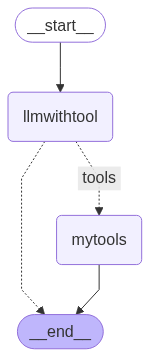

In [86]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [87]:
app2.invoke({"messages":["what is a weather in bengraluru?"]})


{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='010ee0b6-0657-402b-93fe-8f48982c6ee8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rp3n3M9ext7iXUsfZT17Rk1P', 'function': {'arguments': '{"query":"weather in Bengaluru"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BiCnxZk0Rd9qIFTMOdMhxqYe2MfJv', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--03b62d54-19a6-4feb-8dd7-01d1b4580407-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Beng

In [88]:
app2.invoke({"messages":["what is a weather in delhi?"]})


{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='57c28aa6-0075-4faa-a2f8-6c90eb61e4f3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_MEPLlLIzR6d6W5aBACk102RD', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 54, 'total_tokens': 69, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BiCo9Fe9qTVrbHdKZIObC02HQxr3o', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d02bfbed-b1ae-432c-9222-89b6583f09b5-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id'

In [89]:
app2.invoke({"messages":["hi how are you?"]})


{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='2b3cb89e-0b10-49a6-b373-ce2f952f3539'),
  AIMessage(content="Hello! I'm just a computer program, but I'm here and ready to help you. How are you doing today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 51, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BiCoINkd8PX86jlimHNhpQyKnr3f9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--59952e4e-8883-463c-abe7-02c4072fffdf-0', usage_metadata={'input_tokens': 51, 'output_tokens': 24, 'total_tokens': 75, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_detai